#### Challenge: evaluate your sentiment classifier
Using the evaluation techniques we've covered here, look at your classifier's performance in more detail. Then go back and iterate by engineering new features, removing poor features, or tuning parameters. 

**Repeat this process until you have five different versions of your classifier.** Once you've iterated, answer these questions to compare the performance of each:

    Do any of your classifiers seem to overfit?
    
    Which seem to perform the best? Why?
    
    Which features seemed to be most impactful to performance?

Write up your iterations and answers to the above questions in a few pages. Submit a link below and go over it with your mentor to see if they have any other ideas on how you could improve your classifier's performance.

##### original model (from previous challenge)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

data source: https://archive.ics.uci.edu/ml/machine-learning-databases/00331/

training data set: amazon_cells_labelled.txt delimiter: sentence \t score \n

In [2]:
data_path = (r'C:\Users\katec\Thinkful\data_collections\sentiment labelled sentences\amazon_cells_labelled.txt')
amazon_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
amazon_raw.columns = ['sentence', 'score']

In [3]:
amazon_raw.head()

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [4]:
amazon_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
sentence    1000 non-null object
score       1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [5]:
keywords = ['good', 'great', 'fantastic', 'love', 
            'excellent', 'value', 'problems', 'must have', 
            'wasted', 'impressed', 'recommend', 'loved', 'problem', 
            'best', 'helpful', 'hate', 'hated', 'poor', 'nice', 
            'disappointed', 'like', 'didn\'t like', 'sturdy', 
            'happy', 'complaints', 'drawback', 'comfortable', 
            'uncomfortable', 'bargain', 'well', 'unreliable', 'cool',
            'broke', 'super', 'beware', 'supposedly', 'beautiful', 
            'unhappy', 'winner', 'upset', 'damaged', 'failed',
            'waste', 'glad', 'flaw', 'flawed',
            'bad', 'useless', 'worst', 'horrible', 'pleased', 'excited',
            'mistake', 'not', 'smell', 'incredible', 'unreliable',
            'helpful', 'junk', 'terrible', 'wise', 'lacking', 'money back',
            'sucks', 'average', 'defect', 'difficult', 'defective',
            'rocks', 'frustrated', 'avoid', 'easy', 'nice', 'crashed',
            'sorry', 'joy']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amazon_raw[str(key)] = amazon_raw.sentence.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [6]:
amazon_raw['allcaps'] = amazon_raw.sentence.str.isupper()

In [7]:
amazon_raw['score'] = (amazon_raw['score'] == 0) #predicting negative (bad) review

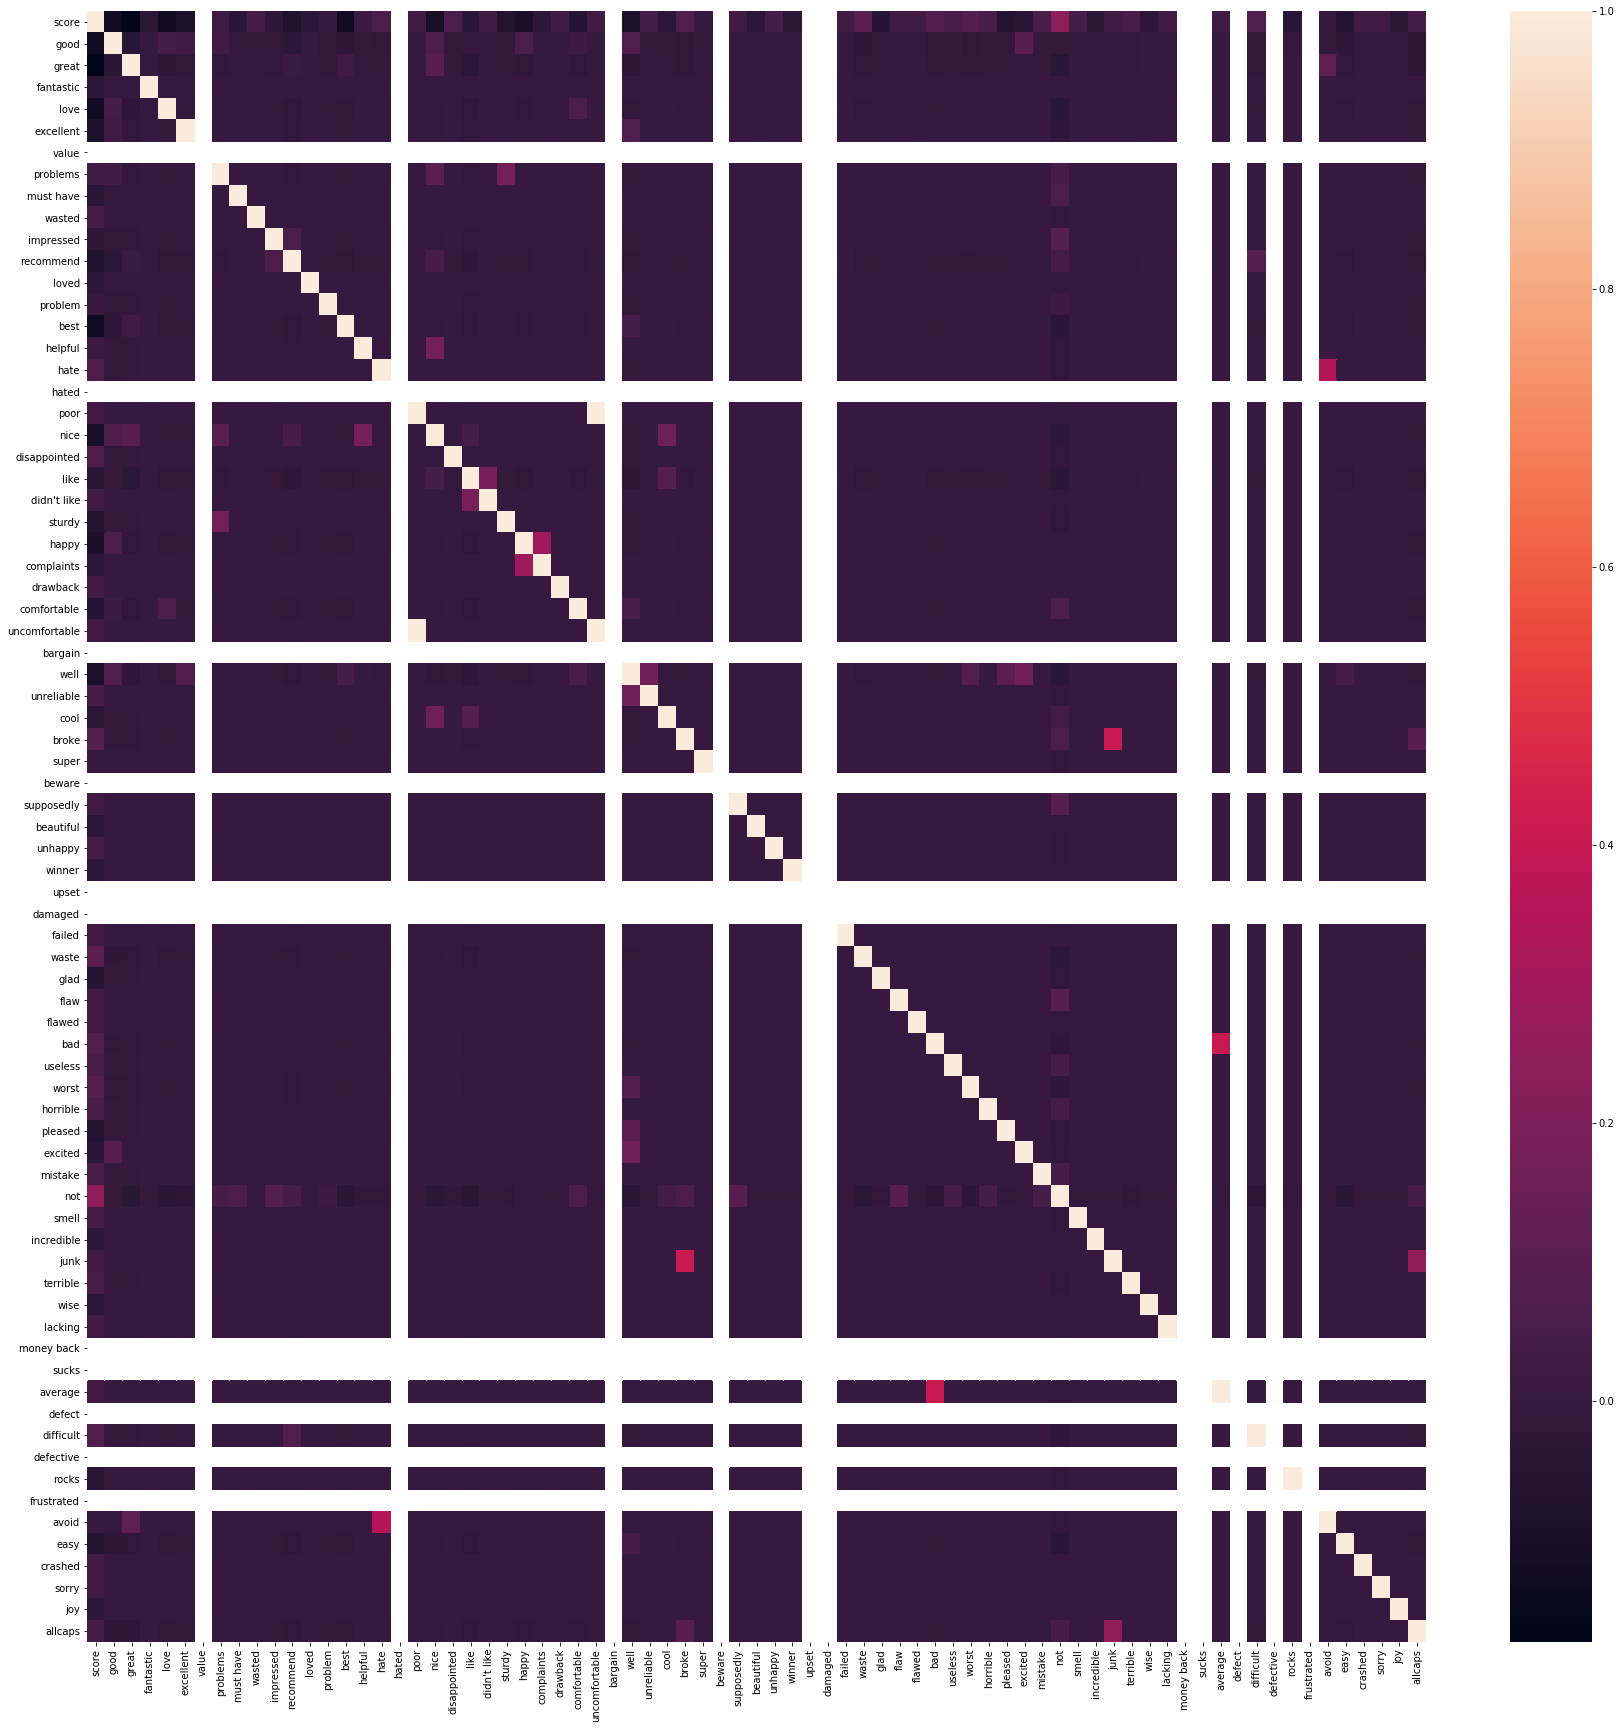

In [8]:
plt.figure(figsize=(30,30))
sns.heatmap(amazon_raw.corr())

##### should the words with areas in white be removed???
Note: checked for NaN words: the word 'value', 'hated', 'bargain' DO appear in reviews. 
Not in reviews: 'beware', 'upset', 'damaged', 'money back', 'sucks', 'defect', 'defective', 'frustrated'
will leave in for first run to see how it affects the accuracy of model

In [9]:
amazon_raw.corr()

,score,good,great,fantastic,love,excellent,value,problems,must have,wasted,...,difficult,defective,rocks,frustrated,avoid,easy,crashed,sorry,joy,allcaps
score,1.000000e+00,-0.119296,-0.173537,-0.031639,-0.127515,-0.089803,NaN,0.022451,-0.044766,0.044766,...,0.070888,NaN,-0.044766,NaN,1.553138e-19,-0.061797,0.031639,0.031639,-0.031639,0.041135
good,-1.192962e-01,1.000000,-0.042381,-0.007258,0.043881,0.030903,NaN,0.030903,-0.010270,-0.010270,...,-0.016263,NaN,-0.010270,NaN,-1.027006e-02,-0.026329,-0.007258,-0.007258,-0.007258,-0.028311
great,-1.735368e-01,-0.042381,1.000000,-0.005845,-0.023556,-0.016589,NaN,-0.016589,-0.008270,-0.008270,...,-0.013095,NaN,-0.008270,NaN,1.170298e-01,-0.021201,-0.005845,-0.005845,-0.005845,-0.022797
fantastic,-3.163860e-02,-0.007258,-0.005845,1.000000,-0.004034,-0.002841,NaN,-0.002841,-0.001416,-0.001416,...,-0.002243,NaN,-0.001416,NaN,-1.416338e-03,-0.003631,-0.001001,-0.001001,-0.001001,-0.003904
love,-1.275153e-01,0.043881,-0.023556,-0.004034,1.000000,-0.011451,NaN,-0.011451,-0.005708,-0.005708,...,-0.009039,NaN,-0.005708,NaN,-5.708371e-03,-0.014634,-0.004034,-0.004034,-0.004034,-0.015736
excellent,-8.980265e-02,0.030903,-0.016589,-0.002841,-0.011451,1.000000,NaN,-0.008065,-0.004020,-0.004020,...,-0.006366,NaN,-0.004020,NaN,-4.020119e-03,-0.010306,-0.002841,-0.002841,-0.002841,-0.011082
value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
problems,2.245066e-02,0.030903,-0.016589,-0.002841,-0.011451,-0.008065,NaN,1.000000,-0.004020,-0.004020,...,-0.006366,NaN,-0.004020,NaN,-4.020119e-03,-0.010306,-0.002841,-0.002841,-0.002841,-0.011082
must have,-4.476615e-02,-0.010270,-0.008270,-0.001416,-0.005708,-0.004020,NaN,-0.004020,1.000000,-0.002004,...,-0.003173,NaN,-0.002004,NaN,-2.004008e-03,-0.005138,-0.001416,-0.001416,-0.001416,-0.005524
wasted,4.476615e-02,-0.010270,-0.008270,-0.001416,-0.005708,-0.004020,NaN,-0.004020,-0.002004,1.000000,...,-0.003173,NaN,-0.002004,NaN,-2.004008e-03,-0.005138,-0.001416,-0.001416,-0.001416,-0.005524


In [10]:
#classifier model from previous

data = amazon_raw[keywords + ['allcaps']]
target = amazon_raw['score']

from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(data, target)

#Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 322


###### Using the evaluation techniques we've covered here, look at your classifier's performance in more detail.

In [11]:
#number of bad reviews
target.sum()

500

In [12]:
amazon_raw['y_pred'] = y_pred #true = predicted number of negative reviews
amazon_raw['y_pred'].value_counts()

True     770
False    230
Name: y_pred, dtype: int64

In [13]:
#calculate the accuracy of your model = success rate
#(total variables - incorrect = correct) / total variables
pred1 = (data.shape[0]- ((target != y_pred).sum()))/data.shape[0]*100
pred1

67.80000000000001

Without modeling, there is a 50/50 chance of predicting the correct type of review (negative or positive). The all-in-one train/test model has an accuracy rate of 67.8%, which is better than by chance. 

In [15]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(target, y_pred)
cm1

array([[204, 296],
       [ 26, 474]], dtype=int64)

The confusion matrix indicates that of the 678 correct responses, the model correctly predicted 204 bad reviews (true positives) = low(er) specificity, and 474 good reviews (true negatives) = high sensitivity. 
There are 296 Type I errors (false positives, predicting bad reviews when reviews are good) and 26 Type II errors (false negatives, predicting good reviews when reviews are bad). 

##### holdout group (version 2)
rerun data with holdout model

In [16]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

bnb = BernoulliNB()

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)

print('Testing on Training set: ' + str(bnb.fit(X_train, y_train).score(X_train, y_train)))
print('Testing on Test set: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))#this is the correct version


Testing on Training set: 0.68
Testing on Test set: 0.665



Compared to the original model where the model was trained and tested on the same data, the accuracy of the holdout model on the training set is comparable to the all-in-one test. The accuracy of the test set is lower than the training set, but relatively close.  

In [17]:
y_train_pred = bnb.fit(X_train, y_train).score(X_train, y_train)
y_test_pred = bnb.fit(X_train, y_train).score(X_test, y_test)

In [18]:
from sklearn.metrics import confusion_matrix
#??? how to get confusion matrix on holdout model
confusion_matrix(X_train, y_train_pred)

TypeError: Singleton array 0.68 cannot be considered a valid collection.

##### cross validation (version 3)
more robust version of holdout groups

In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.69, 0.66, 0.68, 0.6 , 0.71, 0.65, 0.7 , 0.63, 0.67, 0.64])

The relative variations in accuracy scores indicate overfitting of model. 

In [20]:
y3_pred = (bnb.predict(data))
cm_3 = confusion_matrix(target, y3_pred)
cm_3

array([[203, 297],
       [ 26, 474]], dtype=int64)

Noted difference of only -1 between true positive and +1 false positive. This movement is away from accuracy. 

##### changing keywords (version 4)

Removing words from keywords not appearing in reviews: 'beware', 'upset', 'damaged', 'money back', 'sucks', 'defect', 'defective', 'frustrated'

In [21]:
keywords_rev = ['good', 'great', 'fantastic', 'love', 
            'excellent', 'value', 'problems', 'must have', 
            'wasted', 'impressed', 'recommend', 'loved', 'problem', 
            'best', 'helpful', 'hate', 'hated', 'poor', 'nice', 
            'disappointed', 'like', 'didn\'t like', 'sturdy', 
            'happy', 'complaints', 'drawback', 'comfortable', 
            'uncomfortable', 'bargain', 'well', 'unreliable', 'cool',
            'broke', 'super', 'supposedly', 'beautiful', 
            'unhappy', 'winner', 'failed',
            'waste', 'glad', 'flaw', 'flawed',
            'bad', 'useless', 'worst', 'horrible', 'pleased', 'excited',
            'mistake', 'not', 'smell', 'incredible', 'unreliable',
            'helpful', 'junk', 'terrible', 'wise', 'lacking', 
            'average', 'difficult', 'rocks', 'avoid', 'easy', 
            'nice', 'crashed', 'sorry', 'joy']

for key in keywords_rev:
    
    amazon_raw[str(key)] = amazon_raw.sentence.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

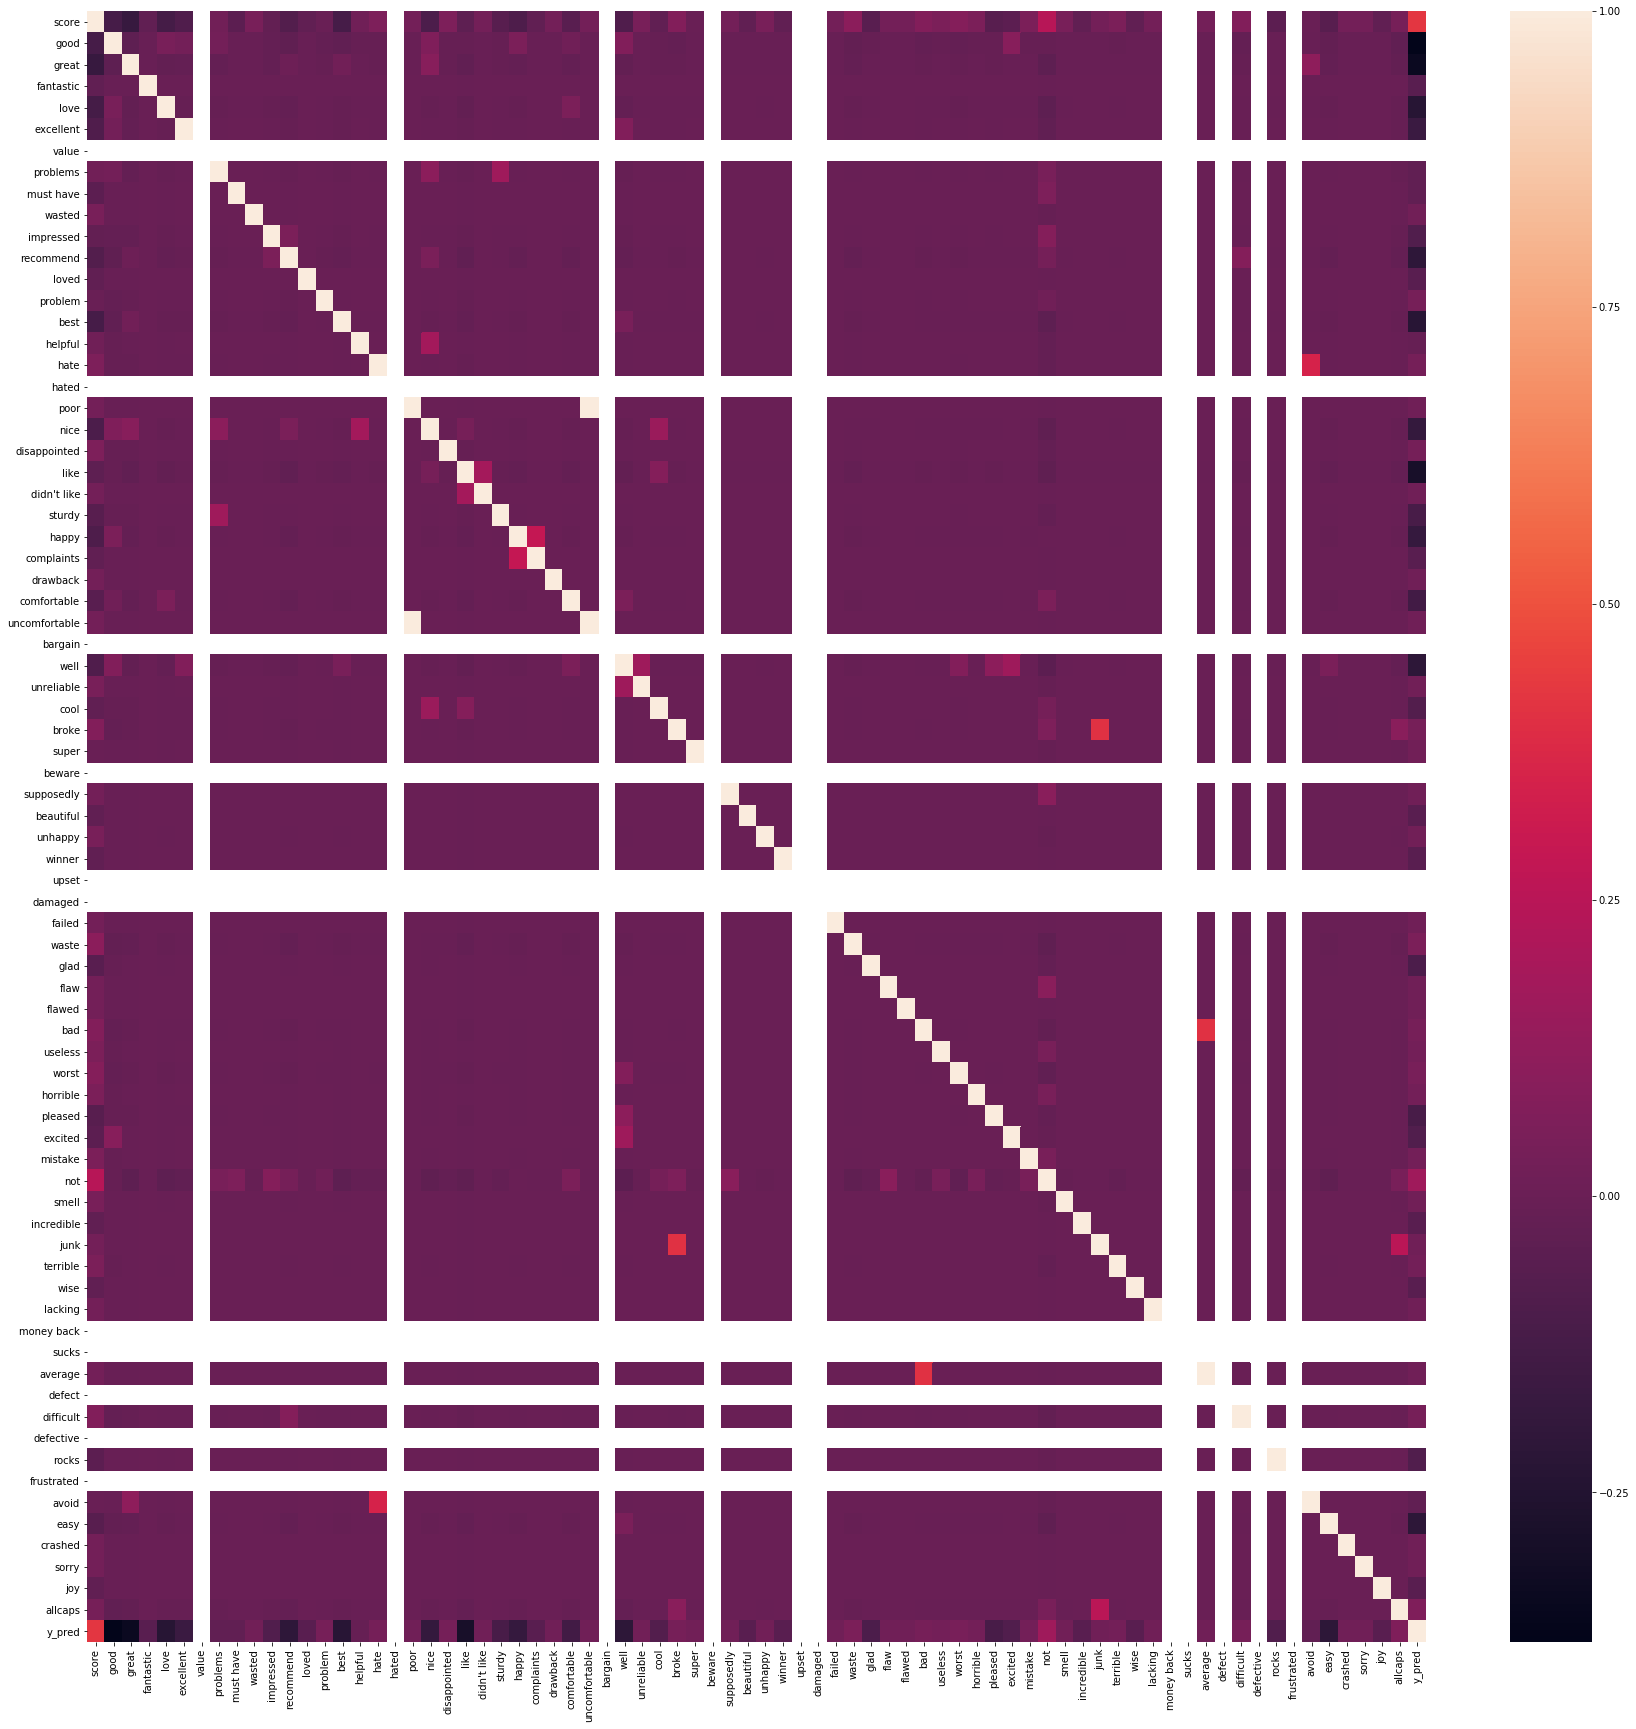

In [22]:
plt.figure(figsize=(30,30))
sns.heatmap(amazon_raw.corr())

In [23]:
data_rev = amazon_raw[keywords_rev + ['allcaps']]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(data_rev, target, test_size=0.2, random_state=20)

print('Testing on Training set: ' + str(bnb.fit(X_train, y_train).score(X_train, y_train)))
print('Testing on Test set: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))#this is the correct version


Testing on Training set: 0.68
Testing on Test set: 0.665


Results appear to be the same as on Version 2

In [25]:
cross_val_score(bnb, data_rev, target, cv=10)

array([0.69, 0.66, 0.68, 0.6 , 0.71, 0.65, 0.7 , 0.63, 0.67, 0.64])

Results appear to be the sampe as in Version 3. 

In [32]:
y4_pred = (bnb.predict(data_rev))
cm_4 = confusion_matrix(target, y4_pred)
cm_4

ValueError: Expected input with 65 features, got 69 instead

##### Version 5

Removing all keywords with NaN correlation map:
'value', 'hated', 'bargain', 'beware', 'upset', 'damaged', 'money back', 'sucks', 'defect', 'defective', 'frustrated'
Also removing all caps feature

In [26]:
keywords2_rev = ['good', 'great', 'fantastic', 'love', 
            'excellent', 'problems', 'must have', 
            'wasted', 'impressed', 'recommend', 'loved', 'problem', 
            'best', 'helpful', 'hate', 'poor', 'nice', 
            'disappointed', 'like', 'didn\'t like', 'sturdy', 
            'happy', 'complaints', 'drawback', 'comfortable', 
            'uncomfortable', 'well', 'unreliable', 'cool',
            'broke', 'super', 'supposedly', 'beautiful', 
            'unhappy', 'winner', 'failed',
            'waste', 'glad', 'flaw', 'flawed',
            'bad', 'useless', 'worst', 'horrible', 'pleased', 'excited',
            'mistake', 'not', 'smell', 'incredible', 'unreliable',
            'helpful', 'junk', 'terrible', 'wise', 'lacking', 
            'average', 'difficult', 'rocks', 'avoid', 'easy', 
            'nice', 'crashed', 'sorry', 'joy']

for key in keywords2_rev:
    
    amazon_raw[str(key)] = amazon_raw.sentence.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [27]:
data_rev2 = amazon_raw[keywords2_rev]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(data_rev2, target, test_size=0.2, random_state=20)

print('Testing on Training set: ' + str(bnb.fit(X_train, y_train).score(X_train, y_train)))
print('Testing on Test set: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))#this is the correct version


Testing on Training set: 0.68
Testing on Test set: 0.665


In [29]:
cross_val_score(bnb, data_rev2, target, cv=10)

array([0.69, 0.66, 0.68, 0.6 , 0.71, 0.65, 0.7 , 0.63, 0.67, 0.64])

Again, no noteable difference in accuracy scores between versions. 

In [33]:
y5_pred = (bnb.predict(data_rev2))
cm_5 = confusion_matrix(target, y5_pred)
cm_5

array([[203, 297],
       [ 26, 474]], dtype=int64)

##### questions
1. what is the heatmap telling me? Should I be removing keywords based on heatmap?
2. how do I get confusion matrix on each version?
3. other models? linear regression model?

1. The heatmap does indicate that some words are not contained in the reviews (although some actually ARE in the reviews). Removing the keywords based on the results of the heatmap do not appear to affect accuracy in any version of the model. 

2. Unsure how to get a confusion matrix on the holdout group. Will discuss with mentor. 

3. Discussed using other models with my mentor, including KFold, etc. Her advise was to stick to the models used in examples for this challenge. 